In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

vdfx = pd.read_csv("./final_result_impl_normals_int.csv", index_col=0)
cdfx = pd.read_csv("./catapult_normals_latency.csv", index_col=0)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
#vdfx['ff_inv'] = 1/vdfx['ff']
#cdfx['lut_inv'] = 1/cdfx['lut']
#vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = cdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = cdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
# drop columns
cdfx['mem_partition_size'] = cdfx['knob_partition_factor']
vdfx['mem_partition_size'] = 921600/vdfx['knob_partition_factor']
cdfx = cdfx.drop(columns=['knob_I_B', 'knob_partition_factor'])
vdfx = vdfx.drop(columns=['knob_'])

Text(0.5, 1.0, 'Normals Combined Design Space')

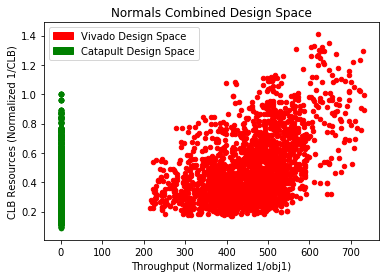

In [2]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Design Space')
green_data = mpatches.Patch(color='green', label='Catapult Design Space')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("Normals Combined Design Space")

In [3]:
print("~~~~~~~~~~~ Area Optimized Designs Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Latency Optimized Designs Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Area Optimized Designs Averages ~~~~~~~~~~~~

knob_KNOB_WINDOW_SIZE_X        31.881839
knob_inner_unroll1              2.988441
knob_inner_unroll2              2.950681
knob_outer_unroll               2.950681
knob_partition_factor      218578.165939
Unnamed: 7                      0.330996
obj1                         1044.958644
obj2                         5737.782173
lut                          1045.073979
ff                             37.194708
dsp                             1.000000
bram                                 NaN
throughput                      0.380137
ff_inv                          0.051267
1/obj2                          0.384126
clbUtil                         0.038827
mem_partition_size         218578.165939
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Latency Optimized Designs Averages ~~~~~~~~~~~~

knob_KNOB_WINDOW_SIZE_X         9.452000
knob_inner_unroll1              2.775111
knob_inner_unroll2              2.361333
kn

In [4]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_KNOB_WINDOW_SIZE_X','knob_inner_unroll1','knob_inner_unroll2','knob_outer_unroll','knob_partition_factor'], how='inner')
cv_df.count()

knob_KNOB_WINDOW_SIZE_X    0
knob_inner_unroll1         0
knob_inner_unroll2         0
knob_outer_unroll          0
knob_partition_factor      0
Unnamed: 7                 0
obj1_x                     0
obj2_x                     0
lut                        0
ff                         0
dsp                        0
bram                       0
throughput_x               0
ff_inv                     0
1/obj2_x                   0
clbUtil_x                  0
mem_partition_size_x       0
obj1_y                     0
obj2_y                     0
throughput_y               0
1/obj2_y                   0
clbUtil_y                  0
mem_partition_size_y       0
dtype: int64

In [5]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

ValueError: 'a' must be greater than 0 unless no samples are taken